<a href="https://colab.research.google.com/github/Brandon-lz/master/blob/main/aicodes/10%E6%B1%82%E6%A2%AF%E5%BA%A6/%E6%8D%9F%E5%A4%B1%E5%87%BD%E6%95%B0%E5%8F%8A%E5%85%B6%E6%A2%AF%E5%BA%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

MSE: Mean Squared Error  均方差
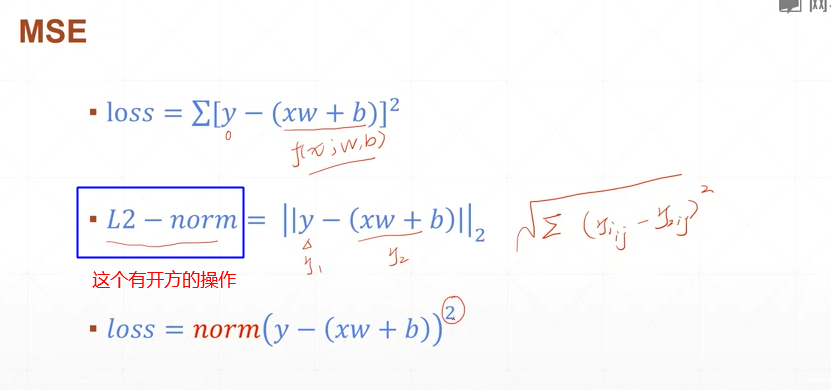

In [ ]:
x = tf.random.normal([2,4])
w = tf.random.normal([4,3])
b = tf.zeros([3])
y = tf.constant([2,0])      #结果

In [ ]:
with tf.GradientTape() as tape:
  tape.watch([w,b])             #如果w、b不是tf.Variable类型，则需要写下这句话，否则无法求导
  prob = tf.nn.softmax(x@w+b,axis=1)    #预测结果，如果是二分类问题可以用sigmoid函数
  loss = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y,depth=3),prob))     #对MSE求一次平均，防止梯度爆炸

#求参数w，b的导数
grads = tape.gradient(loss,[w,b])  
grads[0],grads[1]

(<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
 array([[ 0.07903272, -0.03711972, -0.041913  ],
        [ 0.03474038, -0.01100582, -0.02373456],
        [-0.10568945,  0.02330989,  0.08237957],
        [-0.03641303,  0.01781358,  0.01859945]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.01561669,  0.03328441, -0.01766773], dtype=float32)>)

Softmax 将一组标量变为一组概率和为1的概率，求softmax梯度也不需要单独计算，根据公式可直接求出导数




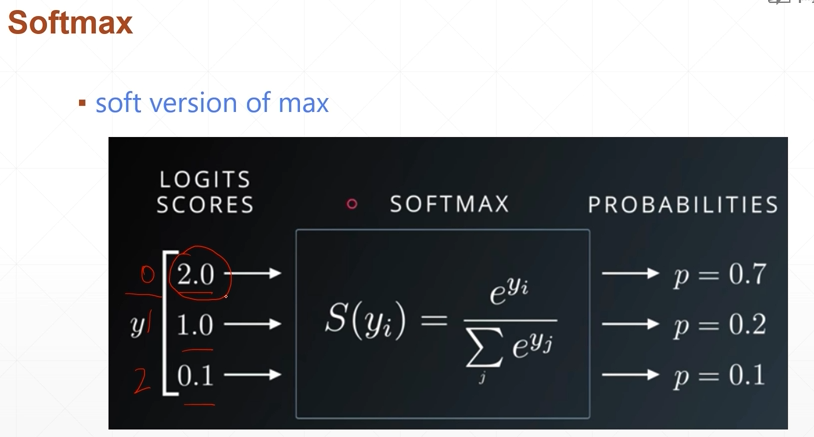

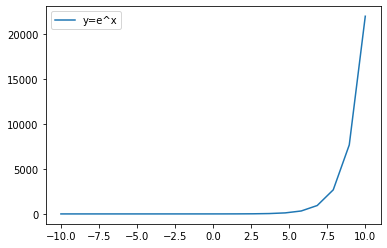

In [ ]:
import matplotlib.pyplot as plt
x = tf.linspace(-10,10,20)
y = tf.exp(x)
plt.plot(x,y)
plt.legend(['y=e^x'])
plt.show()

softmax求梯度：

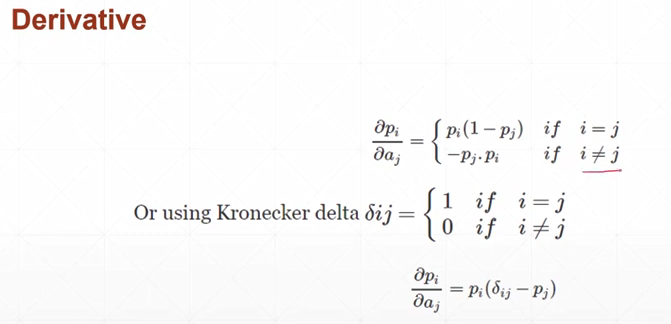

Crossentropy gradient  交叉熵的梯度

In [ ]:
x = tf.random.normal([2,4])
w = tf.random.normal([4,3])
b = tf.zeros([3])
y = tf.constant([2,0])

In [ ]:
with tf.GradientTape() as tape:
  tape.watch([w,b])
  logits = x@w + b
  loss = tf.reduce_mean(tf.losses.categorical_crossentropy(tf.one_hot(y,depth=3),logits,from_logits=True))   #交叉熵的激活函数sotfmax在函数里面，只要将from_logits置为True即可完成激活函数功能
grads = tape.gradient(loss,[w,b])
grads[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.1392908 ,  0.55896914, -0.4196784 ], dtype=float32)>